In [15]:
include("markov_utils.jl")
using .Markov, LinearAlgebra, Statistics, Distributions, Plots, Printf, Random

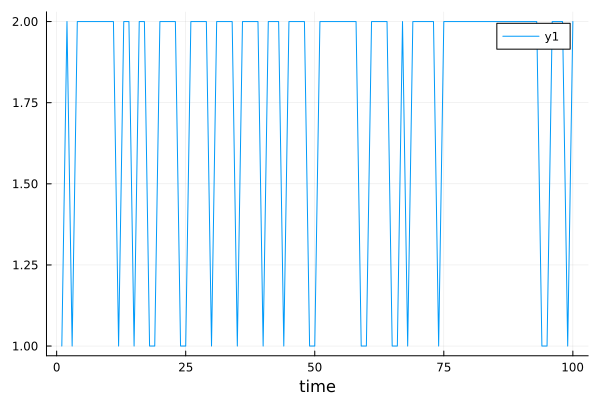

In [24]:
# generate some stochastic matrix
P = [0.3 0.7; 0.2 0.8]

periods = 100
init_state = 1
sample_path = mc_sample_path(P, init = init_state, sample_size = periods);

plot(sample_path,xlabel = "time")


In [36]:
# let's understand better how it works!

coin = Categorical([0.5, 0.5]); # 2 discrete states and their probabilities
dice = Categorical([1/6, 1/6, 1/6, 1/6, 1/6, 1/6]); # 6 discrete states and their probabilities

@show coin;
@show dice;

coin = Categorical{Float64, Vector{Float64}}(support=Base.OneTo(2), p=[0.5, 0.5])
dice = Categorical{Float64, Vector{Float64}}(
support: Base.OneTo(6)
p: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
)



In [34]:
# toss a coin 5 times! 
@show rand(coin, 5);

# roll a dice 3 times!
@show rand(dice, 3);

rand(coin, 5) = [1, 1, 1, 2, 2]
rand(dice, 3) = [5, 1, 3]


In [35]:
@show pdf(dice, 1) # the probability of rolling 1
@show support(dice)
@show pdf.(dice, support(dice)); # broadcast the pdf over the whole support

pdf(dice, 1) = 0.16666666666666666
support(dice) = Base.OneTo(6)
pdf.(dice, support(dice)) = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


In [40]:
bad_coin = Bernoulli(0.3); #so what is this?

@show pdf(bad_coin, 1) 
@show support(bad_coin)
@show pdf.(bad_coin, support(bad_coin)); 

# toss a bad coin 5 times! 
@show rand(bad_coin, 5);

pdf(bad_coin, 1) = 0.3
support(bad_coin) = 0:1
pdf.(bad_coin, support(bad_coin)) = [0.7, 0.3]
rand(bad_coin, 5) = Bool[0, 1, 0, 0, 0]


sequence_roll = [5, 6, 3, 6, 4, 5, 6, 3, 3, 4, 6, 5, 1, 5, 3, 2, 1, 1, 4, 1]
outcome = [5, 10, 0, 10, 1, 5, 10, 0, 0, 1, 10, 5, -20, 5, 0, 0, -20, -20, 1, -20]


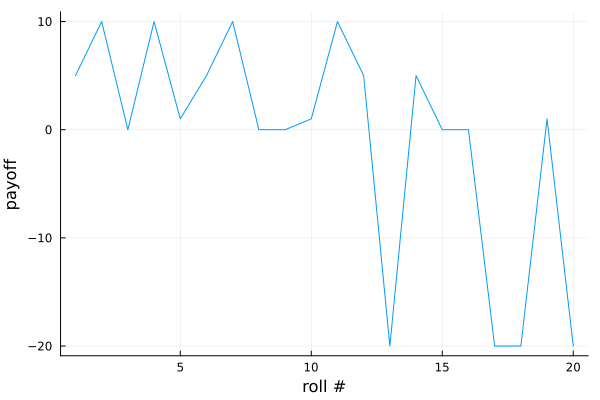

In [70]:
sequence_roll = rand(dice, 20);
payoffs = [-20; 0; 0; 1; 5; 10];

outcome = payoffs[sequence_roll];

@show sequence_roll;
@show outcome;

plot(outcome,xlabel = "roll #",ylabel = "payoff",legend = false)


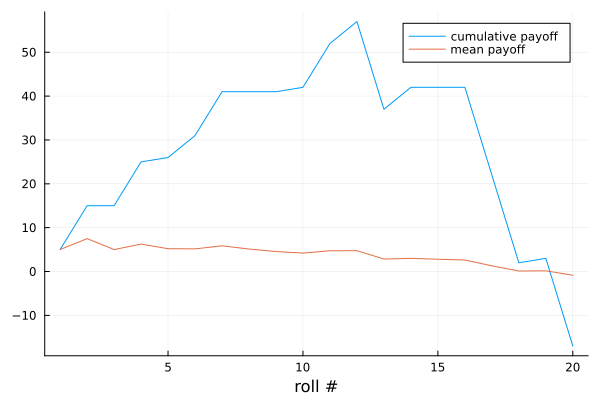

In [77]:
cumul_payoff = cumsum(outcome)
mean_payoff = cumul_payoff./(1:20)
plot(cumul_payoff,label = "cumulative payoff")
plot!(mean_payoff,xlabel = "roll #",label = "mean payoff")


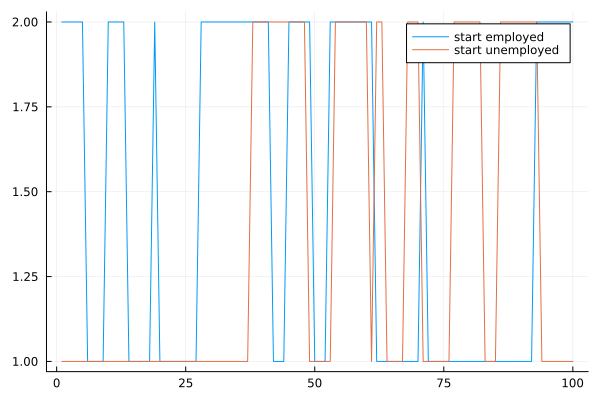

In [85]:
# now back to Markov chains

# an example with unemployed/employed

α = 0.05;  # finds job  
β = 0.1; # loses job

P = [1-α α; 
     β 1-β];


periods = 100
sample_path_initU = mc_sample_path(P, init = 1, sample_size = periods);
sample_path_initE = mc_sample_path(P, init = 2, sample_size = periods);



plot(sample_path_initE, label = "start employed")
plot!(sample_path_initU, label = "start unemployed")


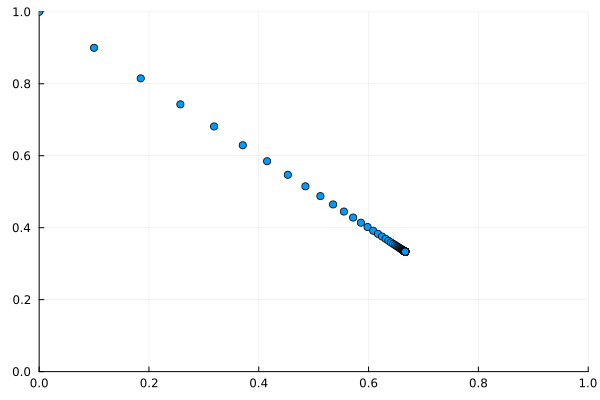

In [107]:
# what happens with the distribution? 

ψ0 = [0 1]; # let this be the initial distribution  
ψ = copy(ψ0)
t = 200 # path length
U_vals = zeros(t)
E_vals = similar(U_vals)


for i in 1:t
    U_vals[i] = ψ[1]
    E_vals[i] = ψ[2]

    ψ = ψ * P # update distribution
end

plt = scatter(U_vals,E_vals, xlim = [0, 1], ylim = [0, 1], label = false)

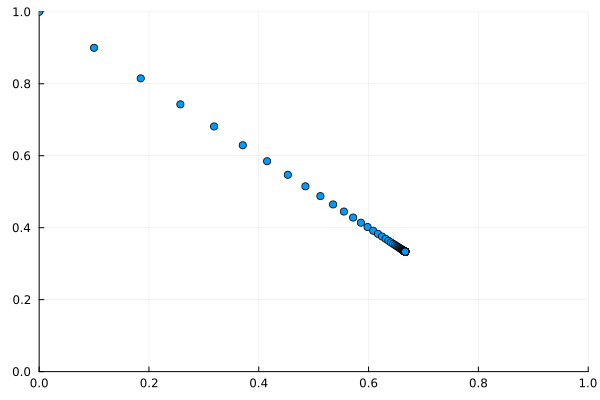

In [108]:
# what happens with the distribution? 

ψ0 = [0 1]; # let this be the initial distribution  
ψ = copy(ψ0)
t = 200 # path length
U_vals = zeros(t)
E_vals = similar(U_vals)


for i in 1:t
    U_vals[i] = ψ[1]
    E_vals[i] = ψ[2]

    ψ = ψ * P # update distribution
end

plt = scatter(U_vals,E_vals, xlim = [0, 1], ylim = [0, 1], label = false)

In [136]:
# get stationary distribution

# iterative approach
ψs1 = ψ0*P^1000;
@show ψs1 ;

# eigenvalue approach
eigval,eigvec = eigen(P');
ψs2 = eigvec[:,2] / sum(eigvec[:,2]);
@show ψs2;


ψs1 = [0.6666666666666659 0.33333333333333304]
ψs2 = [0.6666666666666665, 0.3333333333333334]


In [137]:
# Hamilton 2005

P = [0.971 0.029 0; 0.145 0.778 0.077; 0 0.508 0.492] # normal growth, mild recession, severe recession


3×3 Matrix{Float64}:
 0.971  0.029  0.0
 0.145  0.778  0.077
 0.0    0.508  0.492

In [144]:
P12 = P^12; # prob of transition in one year
@show P12;
ψ0  = [0 0 1]; # initially we are in a severe recession - what is the probability we will return to normal growth in a year?
ψ12 = ψ0 * P12;
@show ψ12;


P12 = [0.8396432464302477 0.14045108247518592 0.01990567109456607; 0.7022554123759295 0.25360952223468536 0.04413506538938514; 0.6566286309116598 0.291176795036463 0.05219457405187716]
ψ12 = [0.6566286309116598 0.291176795036463 0.05219457405187716]


In [145]:
ψs = ψ0 * P^1000 # unconditional probabilities / stationary distribution 


1×3 Matrix{Float64}:
 0.8128  0.16256  0.02464

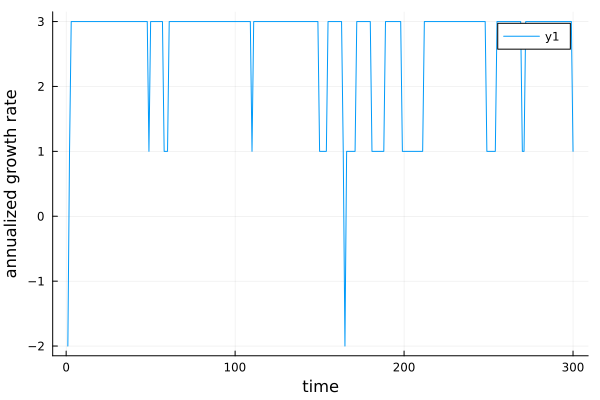

In [164]:
periods = 12 * 25
sample_path_initSR = mc_sample_path(P, init = 3, sample_size = periods);
gdp_growth = [3.0,1.0,-2.0];

time_series = gdp_growth[sample_path_initSR];

plot(time_series,xlabel = "time",ylabel = "annualized growth rate")

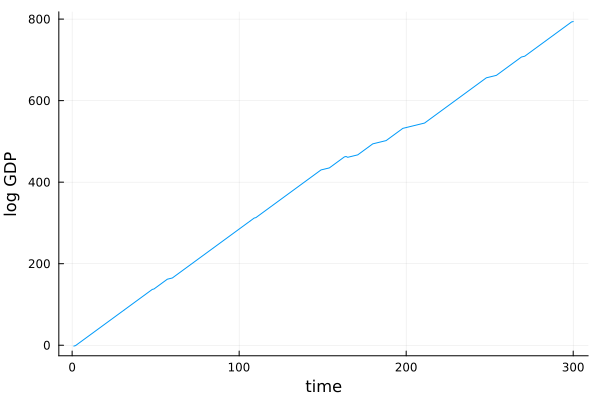

In [165]:
plot(cumsum(time_series),xlabel = "time",ylabel = "log GDP", label = false)